# **PREDICTING HOUSE PRICES USING REGRESSION**

## **📥 Downloading and Extracting the Dataset**
Before we start building our house price prediction model, we need to download the dataset from Kaggle and extract its contents.

### **1️⃣ Install Kaggle API**  
The Kaggle API is required to download datasets directly from Kaggle. If you haven't installed it yet, run the command below:  

In [ ]:
%pip install kaggle

### **2️⃣ Download the Dataset**

Use the following command to download the dataset from the Kaggle competition:

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|██████████| 199k/199k [00:00<00:00, 336kB/s]
100%|██████████| 199k/199k [00:00<00:00, 335kB/s]


### **3️⃣ Extract the Dataset**

The dataset is stored as a ZIP file. We need to extract it before using it in our model.

In [265]:
import zipfile
import os

dataset_zip = "../data/house-prices-advanced-regression-techniques.zip"
dataset_folder = "../data/raw"

with zipfile.ZipFile(dataset_zip, 'r') as folder:
    folder.extractall(dataset_folder)
    

os.listdir(dataset_folder)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

## 📊 Loading the Dataset
Now that we have extracted the dataset, let's load it into Pandas DataFrames for further analysis.

### **1️⃣ Install Pandas**  
Pandas is a powerful library for data manipulation and analysis. If you haven't installed it yet, you can do so using:


In [ ]:
%pip install pandas

In [292]:
import pandas as pd

### **2️⃣ Load the Dataset into Pandas**

- We will use pd.read_csv() to load both the training and test datasets.
- The .head() function allows us to preview the first five rows of the training dataset. This helps us understand the structure of the data, including the features and target variable.

In [293]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **🧼 Data Cleaning**

This section focuses on handling missing values, detecting outliers, and preparing the dataset for modeling.

### **1️⃣ Find columns with missing values.**

In [294]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### **2️⃣ Identify feature types.**

In [295]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features = train_df.select_dtypes(include=['object']).columns

print("Numerical Features:", numerical_features.tolist())
print("Categorical Features:", categorical_features.tolist())

Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

### **3️⃣ Handle Missing Values.**

- Drop columns with missing values greater than 30%.

In [296]:
threshold = 0.3
missing_values = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_ratio = missing_values / len(train_df)
missing_ratio_test = missing_values_test / len(test_df)

drop_cols = missing_ratio[missing_ratio > threshold].index
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

print("Dropped columns:", list(drop_cols))

Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### **4️⃣ Handle Outliers** 
- Replace missing values.
- Replace missing values in categorical columns with the mode (most frequent element).
- Replace missing values in numerical columns with the median (middle value).

In [297]:
categorical_features = [col for col in categorical_features if col in train_df.columns]

train_df[numerical_features] = train_df[numerical_features].fillna(train_df[numerical_features].median())
test_df[numerical_features] = test_df[numerical_features].fillna(train_df[numerical_features].median())

train_df[categorical_features] = train_df[categorical_features].apply(lambda x: x.fillna(x.mode().iloc[0]))
test_df[categorical_features] = test_df[categorical_features].apply(lambda x: x.fillna(train_df[x.name].mode().iloc[0]))


## **⚙️ Data Preprocessing**

This section focuses on preparing the dataset for modeling by encoding categorical features and scaling numerical data.

In [ ]:
%pip install scikit-learn

In [298]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

### **🔄 Data Preprocessing Pipeline**  

To ensure our dataset is properly formatted for machine learning, we apply:  
- **Standard Scaling** to numerical features for normalization.  
- **One-Hot Encoding** to categorical features to handle categorical variables.  

In [299]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

## **📌 Training the Linear Regression Model**  

In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

### **1️⃣ Define the target and variables**
- The target variable is **`SalePrice`**.
- We use **Scikit-Learn's `LinearRegression`** to train our model.
- The model learns relationships between the features and house prices.

In [301]:
x_train = train_df.drop(columns=['SalePrice'])
y_train = train_df['SalePrice']
x_test = test_df.copy()  

print("Train Shape:", x_train.shape)
print("Test Shape:", x_test.shape)

Train Shape: (1460, 74)
Test Shape: (1459, 74)


### **2️⃣ Apply the preprocessing**

In [302]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

print("Transformed Train Shape:", x_train.shape)
print("Transformed Test Shape:", x_test.shape)

Transformed Train Shape: (1460, 267)
Transformed Test Shape: (1459, 267)


### **3️⃣ Train the Linear Regression model**

In [303]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)
print("Linear Regression Model Trained!")

Linear Regression Model Trained!


### **4️⃣ Linear Regression Model Evaluation**

After training the Linear Regression model, we evaluate its performance using **MAE, MSE, RMSE, and R² score**.  

#### **📌 Evaluation Metrics**  
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values. Lower is better.  
- **Mean Squared Error (MSE)**: Similar to MAE but squares the differences, penalizing larger errors more. Lower is better.  
- **Root Mean Squared Error (RMSE)**: The square root of MSE, keeping units consistent with the target variable. Lower is better.  
- **R² Score (R-squared)**: Indicates how well the model explains variance in the data. **Ranges from 0 to 1**, where **1 is a perfect fit**.
- **Cross-Validation RMSE**: Evaluates model stability by splitting the training set into multiple folds and averaging RMSE across them. 

In [304]:
y_train_pred = linear_regression.predict(x_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = (mean_squared_error(y_train, y_train_pred))
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

cv_scores = cross_val_score(linear_regression, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(f"Training MAE: {mae}")
print(f"Training MSE: {mse}")
print(f"Training RMSE: {rmse}")
print(f"Training R^2: {r2}")
print(f"Cross-Validation RMSE: {-cv_scores.mean()}")

Training MAE: 13508.126510158269
Training MSE: 440681302.97284895
Training RMSE: 20992.41060414094
Training R^2: 0.9301258799135025
Cross-Validation RMSE: 34221.99873702238


### **5️⃣ Generating Predictions and Saving to CSV**

After training the Linear Regression model, we use it to make predictions on the test dataset and save the results to a CSV file for submission to [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).  

In [ ]:
test_pred = linear_regression.predict(x_test)

results = pd.DataFrame({"Id": test_df.index + 1461, "SalePrice": test_pred})
results.to_csv("../data/results.csv", index=False)

print("Predictions saved to results.csv")

Predictions saved to results.csv


- Save training predictions on a csv file.

In [ ]:
y_train_results = pd.DataFrame({"Id": train_df.index, "SalePrice": y_train_pred})
y_train_results.to_csv("../data/y_results.csv", index=False)

print("y_train_pred predictions saved to y_results.csv")

y_train_pred predictions saved to y_results.csv


## **📈 Data Visualization**

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

### **1️⃣ Scatterplot: Actual vs Predicted SalePrice(s)**

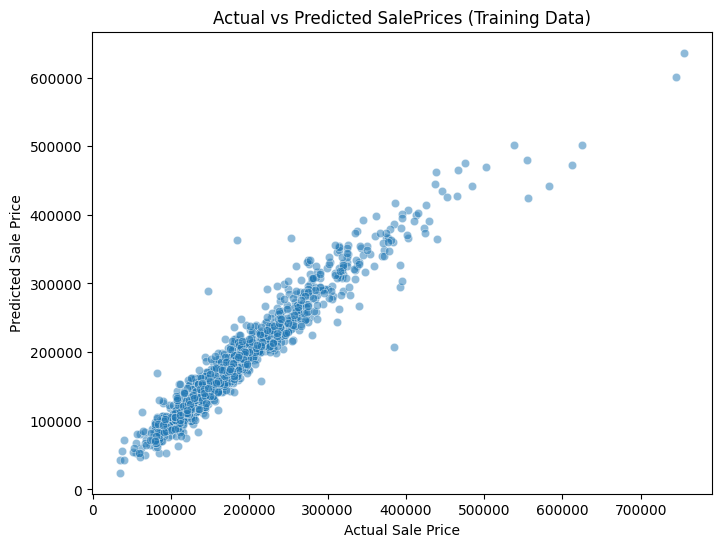

In [324]:
def actual_v_pred_plot(x, y, a):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x, y=y, alpha=a)
    plt.xlabel("Actual Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title("Actual vs Predicted SalePrices (Training Data)")
    plt.show

actual_v_pred_plot(y_train, y_train_pred, 0.5)